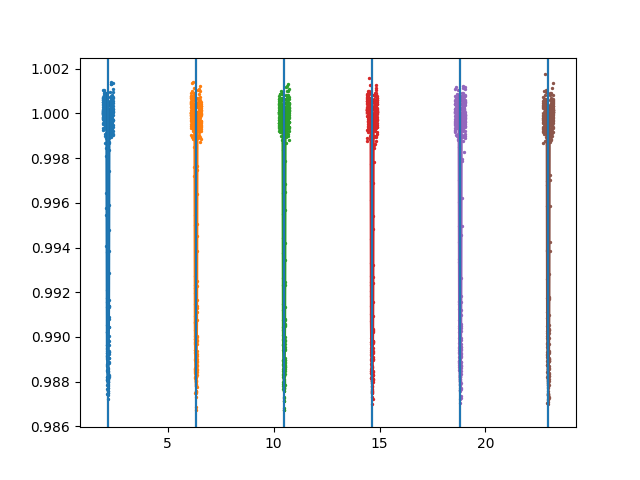

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib widget
from pytransit import RoadRunnerModel


Period = 4.159151
T0 = 2.17
a_scaled = 9.70
incl = 89.0/180.*np.pi
ld_coeff = [0.5, 0.1]
R_scaled = 0.100


TD_list = np.asarray([0, 60, +80, +40, -30, -60, -100, -80, -20, 40])/86400.

plt.figure()


for ii in range(0, 6):
    
    T0_transit =  T0 + Period*ii
    T0_perturbed = T0_transit + TD_list[ii]
    times = np.arange(T0_transit-0.25, T0_transit+0.25, 120/86400)

    tm = RoadRunnerModel('quadratic')
    tm.set_data(times)
    lc = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_perturbed, p=Period, a=a_scaled, i=89.0/180.*np.pi)
    lc_observed = np.random.normal(lc, 0.0005)
    plt.plot(times, lc)
    plt.scatter(times, lc_observed, s=2)

    plt.axvline(T0_transit, c='k')
    plt.axvline(T0_perturbed)
    
    fileout = open('individual_transits/WASP47_simulated_transit0'+repr(ii)+'.dat','w')
    fileout.write('# time flux flux_error jitter offset subset \n')
        
    for v0, v1 in zip(times, lc_observed):
        fileout.write('{0:16.6f} {1:8.5f} 0.00050 0 -1 -1 \n'.format(v0, v1))
    fileout.close()
plt.show()

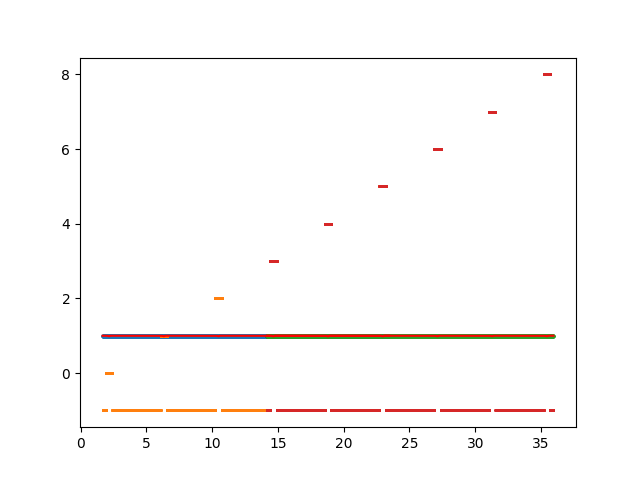

In [20]:
Period = 4.159151
T0 = 2.17
a_scaled = 9.70
incl = 89.0/180.*np.pi
ld_coeff = [0.5, 0.1]
R_scaled = 0.100




fileout_inst00 = open('subset_transits/WASP47_simulated_instrument00.dat','w')
fileout_inst01 = open('subset_transits/WASP47_simulated_instrument01.dat','w')
fileout_inst00.write('# time flux flux_error jitter offset subset \n')

T0_start = T0 - 0.5
T0_end = T0 + Period*5 + 0.5
times_inst00 = np.arange(T0_start, T0_end, 120/86400)
flux_inst00 = np.random.normal(1.000, 0.0005, len(times_inst00))
model_inst00 =  np.ones_like(times_inst01)
flag_inst00 = np.zeros_like(times_inst00)  -1.

T0_start = T0 + Period*3 - 0.5
T0_end = T0 + Period*8 + 0.5
times_inst01 = np.arange(T0_start, T0_end, 120/86400)
flux_inst01 = np.random.normal(1.000, 0.0005, len(times_inst00))
model_inst01 =  np.ones_like(times_inst01)
flag_inst01 = np.zeros_like(times_inst01)  -1.
tm = RoadRunnerModel('quadratic')


for ii in range(0, 9):
    
    T0_transit =  T0 + Period*ii
    T0_perturbed = T0_transit + TD_list[ii]

    times_sel = np.abs(times_inst00 - T0_transit)<0.25

    if np.sum(times_sel)>0:
        times = times_inst00[times_sel]
        tm.set_data(times)
        lc = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_perturbed, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
        lc_nottv = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_transit, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
    
        flux_inst00[times_sel] += lc
        model_inst00[times_sel] += lc_nottv
        flag_inst00[times_sel] = ii


    times_sel = np.abs(times_inst01 - T0_transit)<0.25

    if np.sum(times_sel)>0:
        times = times_inst01[times_sel]
        tm.set_data(times)
        lc = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_perturbed, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
        lc_nottv = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_transit, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
    
        flux_inst01[times_sel] += lc
        model_inst01[times_sel] += lc_nottv
        flag_inst01[times_sel] = ii


    
for v0, v1, v2 in zip (times_inst00, flux_inst00, flag_inst00):
    fileout_inst00.write('{0:12.6f} {1:8.5f} 0.00050 0 -1 {2:3.0f} \n'.format(v0, v1, v2))

for v0, v1, v2 in zip (times_inst01, flux_inst01, flag_inst01):
    fileout_inst01.write('{0:12.6f} {1:8.5f} 0.00050 0 -1 {2:3.0f} \n'.format(v0, v1, v2))


fileout_inst00.close()
fileout_inst01.close()


plt.figure()
plt.scatter(times_inst00, flux_inst00, s=2)
plt.scatter(times_inst00, flag_inst00, s=1)
plt.plot(times_inst00, model_inst00, c='r')

plt.scatter(times_inst01, flux_inst01, s=2)
plt.scatter(times_inst01, flag_inst01, s=1)
plt.plot(times_inst01, model_inst01, c='r')

plt.show()

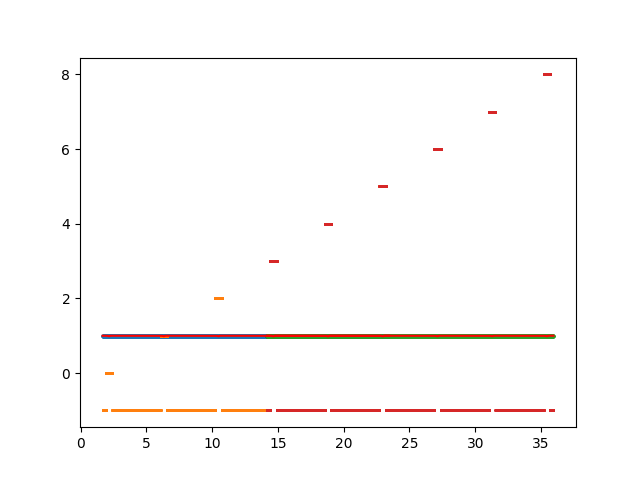

In [21]:
Period = 4.159151
T0 = 2.17
a_scaled = 9.70
incl = 89.0/180.*np.pi
ld_coeff = [0.5, 0.1]
R_scaled = 0.100

T0_start = T0 - 0.5
T0_end = T0 + Period*5 + 0.5
times_inst00 = np.arange(T0_start, T0_end, 120/86400)
flux_inst00 = np.random.normal(1.000, 0.0005, len(times_inst00))
model_inst00 =  np.ones_like(times_inst01)
flag_inst00 = np.zeros_like(times_inst00)  -1.

T0_start = T0 + Period*3 - 0.5
T0_end = T0 + Period*8 + 0.5
times_inst01 = np.arange(T0_start, T0_end, 120/86400)
flux_inst01 = np.random.normal(1.000, 0.0005, len(times_inst00))
model_inst01 =  np.ones_like(times_inst01)
flag_inst01 = np.zeros_like(times_inst01)  -1.
tm = RoadRunnerModel('quadratic')


for ii in range(0, 9):
    
    T0_transit =  T0 + Period*ii
    T0_perturbed = T0_transit + TD_list[ii]

    times_sel = np.abs(times_inst00 - T0_transit)<0.25

    if np.sum(times_sel)>0:
        times = times_inst00[times_sel]
        tm.set_data(times)
        lc = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_perturbed, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
        lc_nottv = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_transit, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
    
        flux_inst00[times_sel] += lc
        model_inst00[times_sel] += lc_nottv
        flag_inst00[times_sel] = ii


    times_sel = np.abs(times_inst01 - T0_transit)<0.25

    if np.sum(times_sel)>0:
        times = times_inst01[times_sel]
        tm.set_data(times)
        lc = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_perturbed, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
        lc_nottv = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_transit, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
    
        flux_inst01[times_sel] += lc
        model_inst01[times_sel] += lc_nottv
        flag_inst01[times_sel] = ii



fileout_inst00 = open('subset_transits/WASP47_simulated_instrument00.dat','w')
fileout_inst01 = open('subset_transits/WASP47_simulated_instrument01.dat','w')
fileout_inst00.write('# time flux flux_error jitter offset subset \n')
fileout_inst01.write('# time flux flux_error jitter offset subset \n')



for v0, v1, v2 in zip (times_inst00, flux_inst00, flag_inst00):
    fileout_inst00.write('{0:12.6f} {1:8.5f} 0.00050 0 -1 {2:3.0f} \n'.format(v0, v1, v2))

for v0, v1, v2 in zip (times_inst01, flux_inst01, flag_inst01):
    fileout_inst01.write('{0:12.6f} {1:8.5f} 0.00050 0 -1 {2:3.0f} \n'.format(v0, v1, v2))


fileout_inst00.close()
fileout_inst01.close()


plt.figure()
plt.scatter(times_inst00, flux_inst00, s=2)
plt.scatter(times_inst00, flag_inst00, s=1)
plt.plot(times_inst00, model_inst00, c='r')

plt.scatter(times_inst01, flux_inst01, s=2)
plt.scatter(times_inst01, flag_inst01, s=1)
plt.plot(times_inst01, model_inst01, c='r')

plt.show()

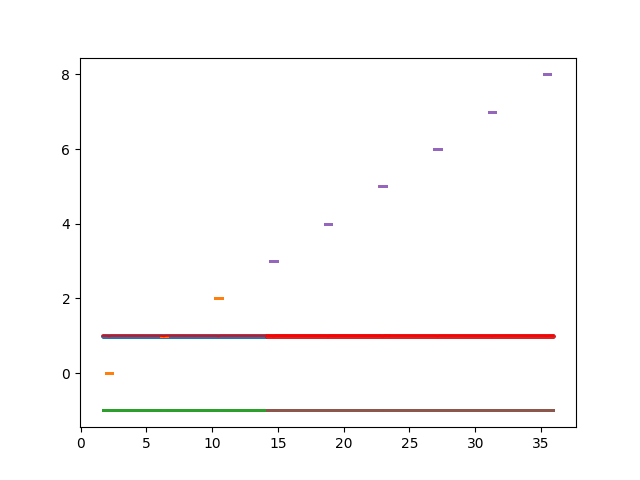

In [61]:
Period = 4.159151
T0 = 2.17
a_scaled = 9.70
incl = 89.0/180.*np.pi
ld_coeff = [0.5, 0.1]
R_scaled = 0.100



ld_coeff = [0.5, 0.1]

T0_start = T0 - 0.5
T0_end = T0 + Period*5 + 0.5
times_inst00 = np.arange(T0_start, T0_end, 120/86400)
flux_inst00 = np.random.normal(1.000, 0.0005, len(times_inst00))
model_inst00 =  np.ones_like(times_inst01)
flag_b_inst00 = np.zeros_like(times_inst00)  -1.
flag_c_inst00 = np.zeros_like(times_inst00)  -1.

T0_start = T0 + Period*3 - 0.5
T0_end = T0 + Period*8 + 0.5
times_inst01 = np.arange(T0_start, T0_end, 120/86400)
flux_inst01 = np.random.normal(1.000, 0.0005, len(times_inst00))
model_inst01 =  np.ones_like(times_inst01)
flag_b_inst01 = np.zeros_like(times_inst01)  -1.
flag_c_inst01 = np.zeros_like(times_inst01)  -1.
tm = RoadRunnerModel('quadratic')


##############  planet b

for ii in range(0, 9):
    
    T0_transit =  T0 + Period*ii
    T0_perturbed = T0_transit + TD_list[ii]

    times_sel = np.abs(times_inst00 - T0_transit)<0.25

    if np.sum(times_sel)>0:
        times = times_inst00[times_sel]
        tm.set_data(times)
        lc = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_perturbed, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
        lc_nottv = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_transit, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
    
        flux_inst00[times_sel] += lc
        model_inst00[times_sel] += lc_nottv
        flag_b_inst00[times_sel] = ii


    times_sel = np.abs(times_inst01 - T0_transit)<0.25

    if np.sum(times_sel)>0:
        times = times_inst01[times_sel]
        tm.set_data(times)
        lc = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_perturbed, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
        lc_nottv = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_transit, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
    
        flux_inst01[times_sel] += lc
        model_inst01[times_sel] += lc_nottv
        flag_b_inst01[times_sel] = ii


fileout_inst00 = open('ancillary_transits/WASP47_simulated_instrument00.dat','w')
fileout_inst01 = open('ancillary_transits/WASP47_simulated_instrument01.dat','w')
fileout_inst00.write('# time flux flux_error jitter offset subset id_transit_b id_transit_c \n')
fileout_inst01.write('# time flux flux_error jitter offset subset id_transit_b id_transit_c \n')

    
for v0, v1, v2, v3 in zip (times_inst00, flux_inst00, flag_b_inst00, flag_c_inst00):
    fileout_inst00.write('{0:12.6f} {1:8.5f} 0.00050 0 -1 -1 {2:3.0f} {3:3.0f} \n'.format(v0, v1, v2, v3))

for v0, v1, v2, v3 in zip (times_inst01, flux_inst01, flag_b_inst01, flag_c_inst01):
    fileout_inst01.write('{0:12.6f} {1:8.5f} 0.00050 0 -1 -1 {2:3.0f} {3:3.0f}  \n'.format(v0, v1, v2, v3))


fileout_inst00.close()
fileout_inst01.close()


plt.figure()
plt.scatter(times_inst00, flux_inst00, s=2)
plt.scatter(times_inst00, flag_b_inst00, s=1)
plt.scatter(times_inst00, flag_c_inst00, s=1)
plt.plot(times_inst00, model_inst00, c='r')

plt.scatter(times_inst01, flux_inst01, s=2)
plt.scatter(times_inst01, flag_b_inst01, s=1)
plt.scatter(times_inst01, flag_c_inst01, s=1)
plt.plot(times_inst01, model_inst01, c='r')

plt.show()





In [47]:
#write ancillary file 

fileout_inst00 = open('ancillary_transits/WASP47_simulated_instrument00_t0list_ancillary.dat','w')
fileout_inst00.write('# planet transit_id  transit_time transit_window \n')

for ii in range(0, 6):
    
    T0_transit =  T0 + Period*ii
    T0_perturbed = T0_transit + TD_list[ii]
    fileout_inst00.write(' b   {0:3.0f} {1:12.6f} {2:8.5f} \n'.format(ii, T0_transit, 0.5))
fileout_inst00.close()

fileout_inst01 = open('ancillary_transits/WASP47_simulated_instrument01_t0list_ancillary.dat','w')
fileout_inst01.write('# planet transit_id  transit_time transit_window \n')

for ii in range(3, 9):
    
    T0_transit =  T0 + Period*ii
    T0_perturbed = T0_transit + TD_list[ii]
    fileout_inst01.write(' b   {0:3.0f} {1:12.6f} {2:8.5f} \n'.format(ii, T0_transit, 0.5))
fileout_inst01.close()

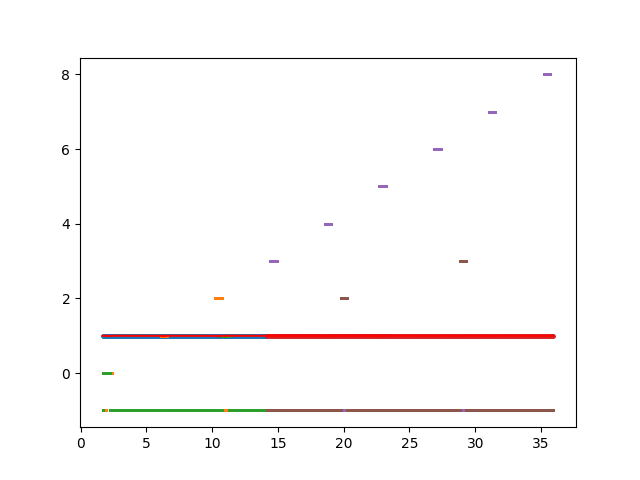

In [60]:
Period = 4.159151
T0 = 2.17
a_scaled = 9.70
incl = 89.0/180.*np.pi
ld_coeff = [0.5, 0.1]
R_scaled = 0.100



ld_coeff = [0.5, 0.1]

T0_start = T0 - 0.5
T0_end = T0 + Period*5 + 0.5
times_inst00 = np.arange(T0_start, T0_end, 120/86400)
flux_inst00 = np.random.normal(1.000, 0.0005, len(times_inst00))
model_inst00 =  np.ones_like(times_inst01)
flag_b_inst00 = np.zeros_like(times_inst00)  -1.
flag_c_inst00 = np.zeros_like(times_inst00)  -1.

T0_start = T0 + Period*3 - 0.5
T0_end = T0 + Period*8 + 0.5
times_inst01 = np.arange(T0_start, T0_end, 120/86400)
flux_inst01 = np.random.normal(1.000, 0.0005, len(times_inst00))
model_inst01 =  np.ones_like(times_inst01)
flag_b_inst01 = np.zeros_like(times_inst01)  -1.
flag_c_inst01 = np.zeros_like(times_inst01)  -1.
tm = RoadRunnerModel('quadratic')


##############  planet b

for ii in range(0, 9):
    
    T0_transit =  T0 + Period*ii
    T0_perturbed = T0_transit + TD_list[ii]

    times_sel = np.abs(times_inst00 - T0_transit)<0.25

    if np.sum(times_sel)>0:
        times = times_inst00[times_sel]
        tm.set_data(times)
        lc = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_perturbed, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
        lc_nottv = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_transit, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
    
        flux_inst00[times_sel] += lc
        model_inst00[times_sel] += lc_nottv
        flag_b_inst00[times_sel] = ii


    times_sel = np.abs(times_inst01 - T0_transit)<0.25

    if np.sum(times_sel)>0:
        times = times_inst01[times_sel]
        tm.set_data(times)
        lc = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_perturbed, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
        lc_nottv = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_transit, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
    
        flux_inst01[times_sel] += lc
        model_inst01[times_sel] += lc_nottv
        flag_b_inst01[times_sel] = ii




##############  planet c


Period = 9.030501
T0 = 1.97
a_scaled = 16.268
incl = 89.32/180.*np.pi
R_scaled = 0.050

for ii in range(0, 9):
    
    T0_transit =  T0 + Period*ii
    T0_perturbed = T0_transit + TD_list[ii]

    times_sel = np.abs(times_inst00 - T0_transit)<0.25

    if np.sum(times_sel)>0:
        times = times_inst00[times_sel]
        tm.set_data(times)
        lc = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_perturbed, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
        lc_nottv = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_transit, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
    
        flux_inst00[times_sel] += lc
        model_inst00[times_sel] += lc_nottv
        flag_c_inst00[times_sel] = ii


    times_sel = np.abs(times_inst01 - T0_transit)<0.25

    if np.sum(times_sel)>0:
        times = times_inst01[times_sel]
        tm.set_data(times)
        lc = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_perturbed, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
        lc_nottv = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_transit, p=Period, a=a_scaled, i=89.0/180.*np.pi) - 1
    
        flux_inst01[times_sel] += lc
        model_inst01[times_sel] += lc_nottv
        flag_c_inst01[times_sel] = ii



fileout_inst00 = open('twoplanets_transits/WASP47_simulated_instrument00.dat','w')
fileout_inst01 = open('twoplanets_transits/WASP47_simulated_instrument01.dat','w')
fileout_inst00.write('# time flux flux_error jitter offset subset id_transit_b id_transit_c \n')
fileout_inst01.write('# time flux flux_error jitter offset subset id_transit_b id_transit_c \n')

    
for v0, v1, v2, v3 in zip (times_inst00, flux_inst00, flag_b_inst00, flag_c_inst00):
    fileout_inst00.write('{0:12.6f} {1:8.5f} 0.00050 0 -1 -1 {2:3.0f} {3:3.0f} \n'.format(v0, v1, v2, v3))

for v0, v1, v2, v3 in zip (times_inst01, flux_inst01, flag_b_inst01, flag_c_inst01):
    fileout_inst01.write('{0:12.6f} {1:8.5f} 0.00050 0 -1 -1 {2:3.0f} {3:3.0f}  \n'.format(v0, v1, v2, v3))


fileout_inst00.close()
fileout_inst01.close()


plt.figure()
plt.scatter(times_inst00, flux_inst00, s=2)
plt.scatter(times_inst00, flag_b_inst00, s=1)
plt.scatter(times_inst00, flag_c_inst00, s=1)
plt.plot(times_inst00, model_inst00, c='r')

plt.scatter(times_inst01, flux_inst01, s=2)
plt.scatter(times_inst01, flag_b_inst01, s=1)
plt.scatter(times_inst01, flag_c_inst01, s=1)
plt.plot(times_inst01, model_inst01, c='r')

plt.show()





# Check the subset option of PyTransit

6
6
6
8.0


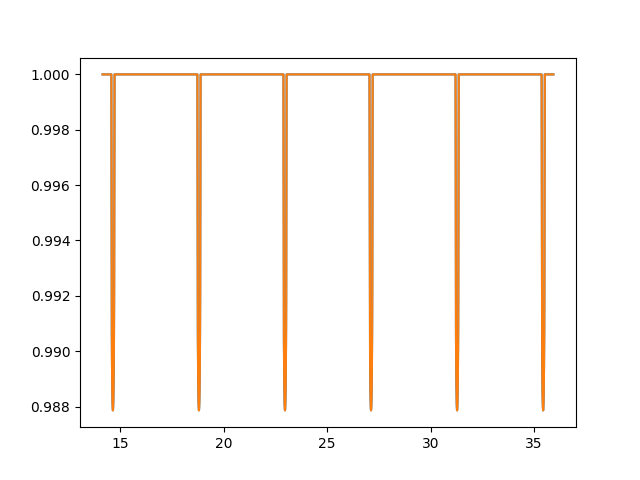

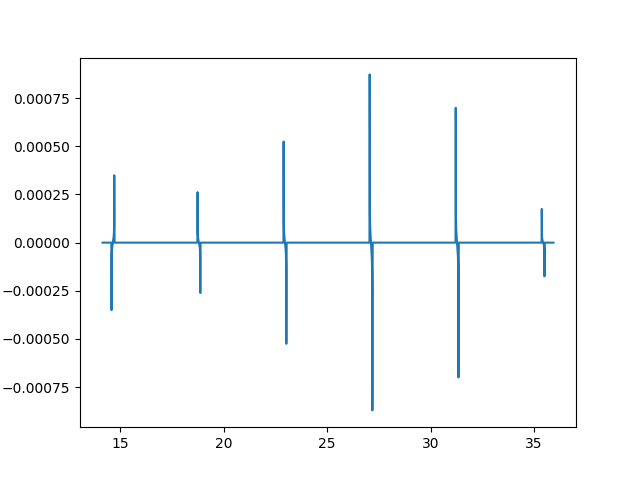

In [71]:
from pytransit import QuadraticModel

Period = 4.159151
T0 = 2.17
a_scaled = 9.70
incl = 89.0/180.*np.pi
ld_coeff = [0.5, 0.1]
R_scaled = 0.100


pytransit_models = QuadraticModel()
transit_id = np.arange(3, 9, dtype=int)-3

T0_transit_list =  T0 + Period*transit_id
T0_perturbed_list = T0_transit_list + TD_list[3:9]

print(len(transit_id))
print(len(T0_transit_list))
print(len(T0_perturbed_list))


print(np.amax(flag_b_inst01))

pytransit_models.set_data(times_inst01, lcids=flag_b_inst01.astype(int)-3, epids=transit_id)

lc = pytransit_models.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0_perturbed_list, p=Period, a=a_scaled, i=89.0/180.*np.pi)


tm = QuadraticModel()
tm.set_data(times_inst01)
lc_nottv = tm.evaluate(k=R_scaled, ldc=ld_coeff, t0=T0, p=Period, a=a_scaled, i=89.0/180.*np.pi)


plt.figure()
plt.plot(times_inst01, lc)
plt.plot(times_inst01, lc_nottv)
plt.show()

plt.figure()
plt.plot(times_inst01, lc_nottv-lc)
plt.show()

# Result independent datasets


In [41]:
Period = 4.159151
T0 = 2.17
a_scaled = 9.70
incl = 89.0/180.*np.pi
ld_coeff = [0.5, 0.1]
R_scaled = 0.100

results = {
'Tc0':[              7,       2.17009,     -0.00018,      0.00019   ],
'Tc1':[              9,       6.32986,     -0.00018,      0.00018   ],
'Tc2':[             11,      10.48920,     -0.00017,      0.00018   ],
'Tc3':[             13,      14.64769,     -0.00018,      0.00018   ],
'Tc4':[             15,      18.80613,     -0.00018,      0.00018   ],
'Tc5':[             17,      22.96484,     -0.00018,      0.00018   ]
}

ii = 0
for tc_key, tc_val in results.items():
    T0_transit =  T0 + Period*ii
    T0_perturbed = T0_transit + TD_list[ii]
    print('measured difference: {0:5.1f} \pm {1:5.1f}    expected {2:5.1f}'.format((tc_val[1]-T0_transit)*86400, tc_val[3]*86400, TD_list[ii]*86400.))
    ii+=1
    

measured difference:   7.8 \pm  16.4    expected   0.0
measured difference:  61.3 \pm  15.6    expected  60.0
measured difference:  77.6 \pm  15.6    expected  80.0
measured difference:  20.5 \pm  15.6    expected  40.0
measured difference: -41.0 \pm  15.6    expected -30.0
measured difference: -79.1 \pm  15.6    expected -60.0


In [42]:
Period = 4.159151
T0 = 2.17
a_scaled = 9.70
incl = 89.0/180.*np.pi
ld_coeff = [0.5, 0.1]
R_scaled = 0.100

results = {
    'Tc_0':[         7,       2.17023,     -0.00017,      0.00018   ],
'Tc_1':[             8,       6.32957,     -0.00017,      0.00017   ],
'Tc_2':[             9,      10.48905,     -0.00018,      0.00018   ],
'Tc_3':[            10,      14.64770,     -0.00018,      0.00017   ],
'Tc_4':[            11,      18.80614,     -0.00018,      0.00018   ],
'Tc_5':[            12,      22.96500,     -0.00017,      0.00017   ],
    }

ii = 0
for tc_key, tc_val in results.items():
    T0_transit =  T0 + Period*ii
    T0_perturbed = T0_transit + TD_list[ii]
    print('measured difference: {0:5.1f} \pm {1:5.1f}    expected {2:5.1f}'.format((tc_val[1]-T0_transit)*86400, tc_val[3]*86400, TD_list[ii]*86400.))
    ii+=1
    

measured difference:  19.9 \pm  15.6    expected   0.0
measured difference:  36.2 \pm  14.7    expected  60.0
measured difference:  64.6 \pm  15.6    expected  80.0
measured difference:  21.3 \pm  14.7    expected  40.0
measured difference: -40.1 \pm  15.6    expected -30.0
measured difference: -65.2 \pm  14.7    expected -60.0
